<a href="https://colab.research.google.com/github/Nikita-Kumari067/Stone-Paper/blob/main/InternshipProject1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Title of Project**
Women Cloth Reviews Prediction with Multi Nomial Naive Bayes



**Objective**
The multinomial Naive Bayes Classifier is suitable for classification with discrete feature(e.g., word counts for text classification). The multinomial distribution normally requires integer feature counts. However, in practice,fractional counts such as tf-idf may also work.

**Data Source**
From YBI Github

**Import Library**

In [8]:
import pandas as pd

In [9]:
import numpy as np

In [10]:
import matplotlib.pyplot as plt

In [11]:
import seaborn as sns

**Import Data**

In [13]:
df = pd.read_csv('https://raw.githubusercontent.com/YBI-Foundation/Teaching-Data/main/Women%20Clothing%20E-Commerce%20Review.csv')

In [14]:
df.head()

,Clothing ID,Age,Title,Review,Rating,Recommended,Positive Feedback,Division,Department,Category
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


**Describe Data**

In [ ]:
df.describe()

,Clothing ID,Age,Rating,Recommended,Positive Feedback
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,918.118709,43.198544,4.196032,0.822362,2.535936
std,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,18.000000,1.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000


**Data Visualization**

In [5]:
ClothingID	=[767,1080,1077,1049,847]

In [6]:
Age =[33,34,60,50,47]

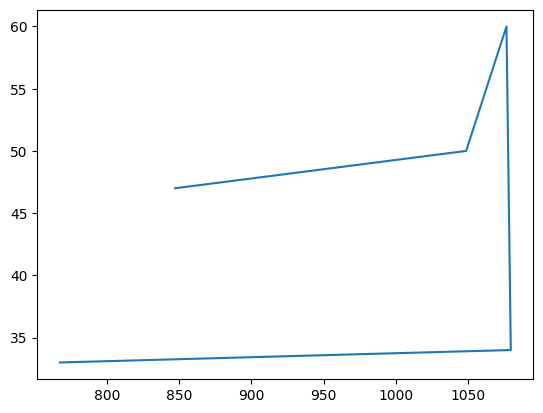

In [15]:
plt.plot(ClothingID,Age)

**Data Preprocessing**

In [16]:
df.isna().sum()

Clothing ID             0
Age                     0
Title                3810
Review                845
Rating                  0
Recommended             0
Positive Feedback       0
Division               14
Department             14
Category               14
dtype: int64

In [17]:
df[df['Review']==""]=np.NAN

In [18]:
df['Review'].fillna("No Review",inplace=True)

In [19]:
df.isna().sum()

Clothing ID             0
Age                     0
Title                3810
Review                  0
Rating                  0
Recommended             0
Positive Feedback       0
Division               14
Department             14
Category               14
dtype: int64

In [20]:
df['Review']

0        Absolutely wonderful - silky and sexy and comf...
1        Love this dress!  it's sooo pretty.  i happene...
2        I had such high hopes for this dress and reall...
3        I love, love, love this jumpsuit. it's fun, fl...
4        This shirt is very flattering to all due to th...
                               ...                        
23481    I was very happy to snag this dress at such a ...
23482    It reminds me of maternity clothes. soft, stre...
23483    This fit well, but the top was very see throug...
23484    I bought this dress for a wedding i have this ...
23485    This dress in a lovely platinum is feminine an...
Name: Review, Length: 23486, dtype: object

**Define Target Variable(y) and Feature Variables(X)**

In [21]:
df.columns

Index(['Clothing ID', 'Age', 'Title', 'Review', 'Rating', 'Recommended',
       'Positive Feedback', 'Division', 'Department', 'Category'],
      dtype='object')

In [22]:
x = df['Review']

In [23]:
y = df['Rating']

In [24]:
df['Rating'].value_counts()

5.0    13131
4.0     5077
3.0     2871
2.0     1565
1.0      842
Name: Rating, dtype: int64

**Train Test Split**

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, stratify = y, random_state = 2529)

In [31]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16440,), (7046,), (16440,), (7046,))

**Modelling**

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

In [33]:
cv = CountVectorizer(lowercase = True, analyzer='word', ngram_range=(2,3), stop_words='english',max_features=5000)

In [34]:
X_train = cv.fit_transform(X_train)

In [35]:
cv.get_feature_names_out()

array(['10 12', '10 bought', '10 fit', ..., 'yellow color', 'yoga pants',
       'zipper little'], dtype=object)

In [36]:
X_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [38]:
cv.get_feature_names_out()

array(['10 12', '10 bought', '10 fit', ..., 'yellow color', 'yoga pants',
       'zipper little'], dtype=object)

**Model Evaluation**

In [44]:
from sklearn.naive_bayes import MultinomialNB

In [45]:
model = MultinomialNB()

In [46]:
model.fit(X_train, y_train)

MultinomialNB()

**Prediction**

In [53]:
y_pred = model.predict(X_test)

ValueError: ignored

In [51]:
y_pred.shape

NameError: ignored

In [52]:
y_pred

NameError: ignored

**Explaination**  Using this model, user can review women cloth.